# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
csv_911= "911.csv"
df_911 = pd.read_csv(csv_911)

** Check the info() of the df **

In [4]:
df_911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
count_byzip = df_911['zip'].value_counts().head()
count_byzip

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
count_bytownship = df_911['twp'].value_counts().head()
count_bytownship

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df_911['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df_911['Reason'] = df_911['title'].str.split(':').str[0]
df_911['Injury'] = df_911['title'].str.split(':').str[1]
df_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Injury
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


** What is the most common Reason for a 911 call based off of this new column? **

In [10]:
reason_count = df_911['Reason'].value_counts()
reason_count

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

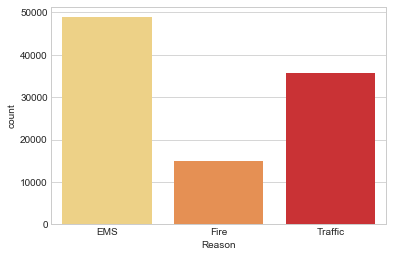

In [11]:
sns.countplot(x='Reason', data=df_911, palette='YlOrRd')
plt.savefig('count_reason.png',bbox_inches='tight')

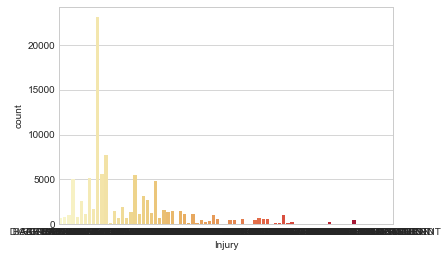

In [12]:
sns.countplot(x='Injury', data=df_911, palette='YlOrRd')
plt.savefig('count_Injury.png',bbox_inches='tight')

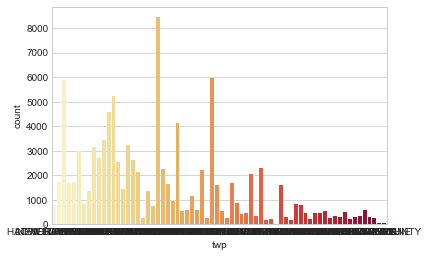

In [13]:
sns.countplot(x='twp', data=df_911, palette='YlOrRd')

plt.savefig('count_twp.png',bbox_inches='tight')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [14]:
df_911.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
Reason        object
Injury        object
dtype: object

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [15]:
df_911['timeStamp'] = pd.to_datetime(df_911['timeStamp'])
df_911.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
Reason               object
Injury               object
dtype: object

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp columnp.**

In [16]:
df_911['Hour'] = df_911['timeStamp'].apply(lambda time: time.hour)
df_911['Month'] = df_911['timeStamp'].apply(lambda time: time.month)
df_911['Day of Week'] = df_911['timeStamp'].apply(lambda time: time.dayofweek)
df_911.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Injury,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3


In [17]:
#creating a dictionary to map the Day's of the week from integers to string values
day_of_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_911['Day of Week'] = df_911['Day of Week'].map(day_of_week)
df_911.to_csv("all_data.csv")
df_911.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Injury,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thu


In [35]:
first_100=df_911.head(100)
first_100.to_csv("first_100.csv")

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

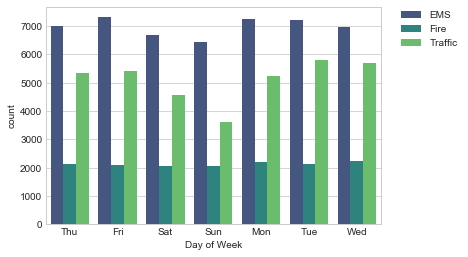

In [18]:
sns.countplot(x='Day of Week', data=df_911,hue='Reason', palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Day_of_Week.png',bbox_inches='tight')

**Now do the same for Month:**

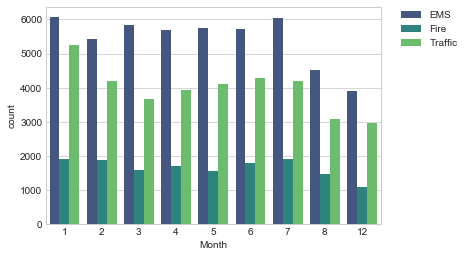

In [49]:
sns.countplot(x='Month', data=df_911,hue='Reason', palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Reason_Month.png',bbox_inches='tight')

**Did you notice something strange about the Plot?**
** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [20]:
groupby_month= df_911.groupby('Month').count()
groupby_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Injury,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

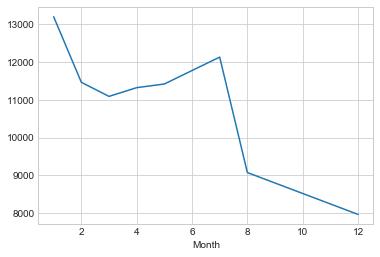

In [21]:
groupby_month['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

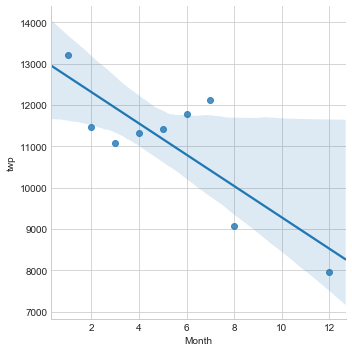

In [22]:
sns.lmplot(x='Month',y='twp',data=groupby_month.reset_index())
plt.savefig('linear_trend.png',bbox_inches='tight')

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [23]:
df_911['Date'] = df_911['timeStamp'].apply(lambda t: t.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

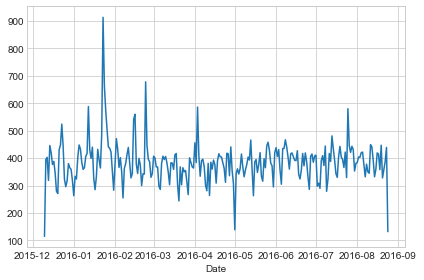

In [24]:
date_calls = df_911.groupby('Date').count()
date_calls['twp'].plot()
plt.tight_layout()
plt.savefig('Overall_Frequency.png',bbox_inches='tight')

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

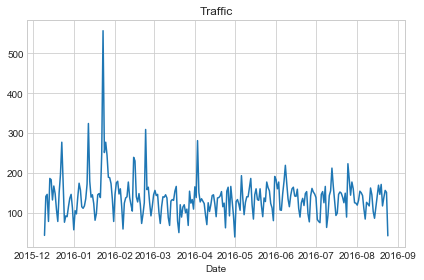

In [25]:
df_911[df_911['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.savefig('traffic_frequency.png',bbox_inches='tight')

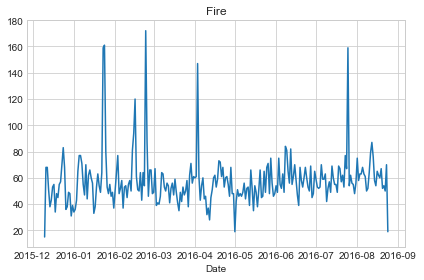

In [26]:
df_911[df_911['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.savefig('fire_frequency.png',bbox_inches='tight')

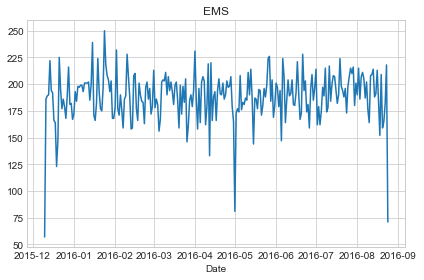

In [27]:
df_911[df_911['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.savefig('ems_frequency.png',bbox_inches='tight')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. 

In [28]:
day_hour = df_911.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
day_hour.to_csv("day_hour.csv")
day_hour.head()


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

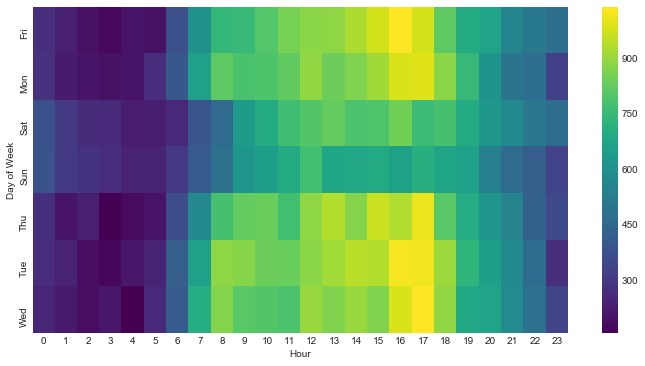

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour,cmap='viridis')
plt.savefig('hr_heatmap.png',bbox_inches='tight')

** Now create a clustermap using this DataFrame. **

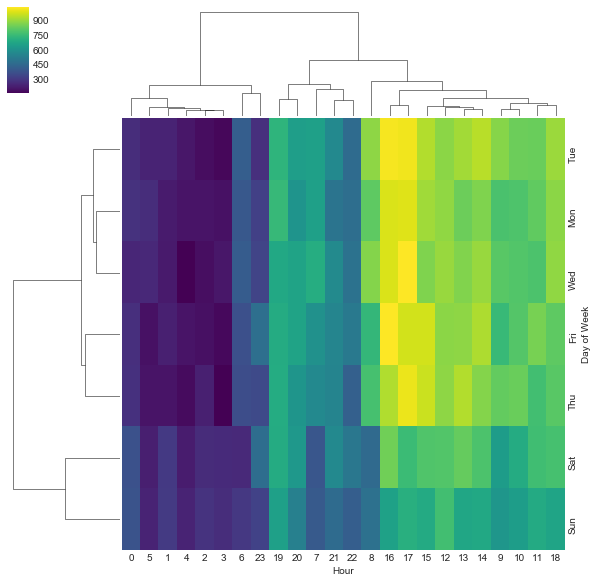

In [30]:
sns.clustermap(day_hour,cmap='viridis')
plt.savefig('hr_clustermap.png',bbox_inches='tight')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [31]:
day_month = df_911.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
day_month.to_csv("day_month.csv")
day_month.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


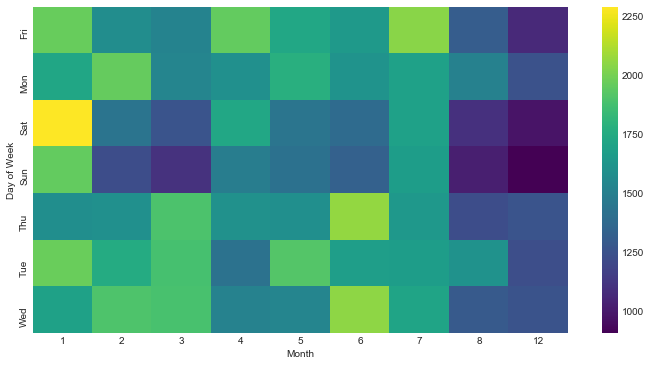

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month,cmap='viridis')
plt.savefig('month_heatmap.png',bbox_inches='tight')

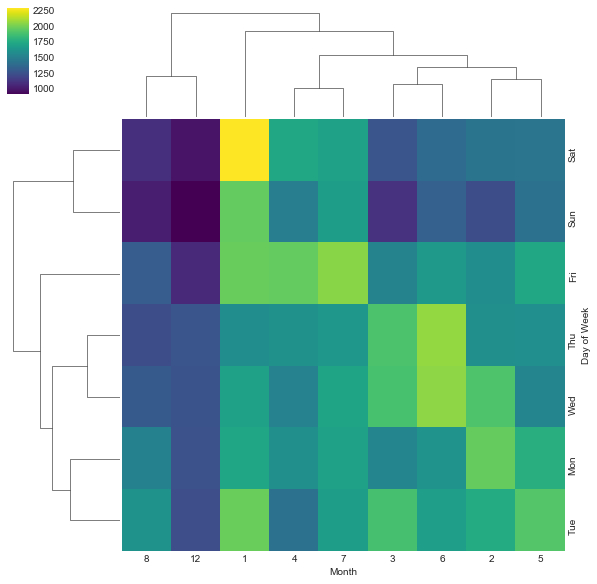

In [43]:
sns.clustermap(day_month,cmap='viridis')
plt.savefig('month_clustermap.png',bbox_inches='tight')

In [38]:
# Vehicle Accidents
# Put this in a variable 'g'
g = df_911[(df_911.title.str.match(r'EMS:.*VEHICLE ACCIDENT.*') | df_911.title.str.match(r'Traffic:.*VEHICLE ACCIDENT.*'))]
g['Month'] = g['timeStamp'].apply(lambda x: x.strftime('%m %B'))
g['Hour'] = g['timeStamp'].apply(lambda x: x.strftime('%H'))
p=pd.pivot_table(g, values='e', index=['Month'] , columns=['Hour'], aggfunc=np.sum)
p.head()

C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
01 January,53,28,21,15,26,38,119,165,231,165,...,210,216,216,285,248,168,152,128,82,56
02 February,42,21,19,10,11,46,84,212,177,153,...,196,214,253,221,240,149,104,71,52,52
03 March,22,32,25,10,23,26,69,176,173,154,...,203,247,279,200,188,115,106,87,71,25
04 April,33,21,28,20,24,18,67,137,170,148,...,230,263,315,279,208,117,89,73,52,48
05 May,44,39,25,23,17,37,72,142,217,186,...,209,274,289,312,210,120,109,112,87,68


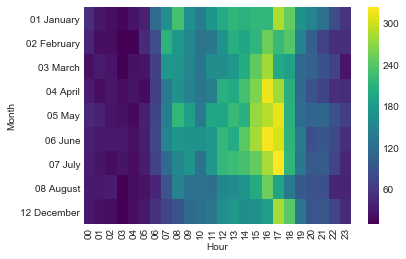

In [48]:
#sns.clustermap(day_month,cmap='viridis')
cmap = sns.cubehelix_palette(light=2, as_cmap=True)
ax = sns.heatmap(p,cmap = 'viridis')
plt.savefig('month_accident_clustermap.png',bbox_inches='tight')

In [65]:
df_911.head()
injury_type = df_911.groupby('Injury').count()
injury_type
#injury_type['Total']= df_911.count('Injury')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Injury,,,,,,,,,,,,,,
ABDOMINAL PAINS,1436,1436,1436,1354,1436,1436,1436,1436,1436,1436,1436,1436,1436,1436
ACTIVE SHOOTER,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ALLERGIC REACTION,438,438,438,410,438,438,438,438,438,438,438,438,438,438
ALTERED MENTAL STATUS,1386,1386,1386,1300,1386,1386,1385,1386,1386,1386,1386,1386,1386,1386
AMPUTATION,14,14,14,12,14,14,14,14,14,14,14,14,14,14
ANIMAL BITE,83,83,83,74,83,83,83,83,83,83,83,83,83,83
APPLIANCE FIRE,193,193,193,183,193,193,193,193,193,193,193,193,193,193
ASSAULT VICTIM,657,657,657,597,657,657,657,657,657,657,657,657,657,657
BACK PAINS/INJURY,739,739,739,687,739,739,739,739,739,739,739,739,739,739
